Inception Classifier

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models,metrics
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from packaging import version
%load_ext tensorboard
!rm -rf ./logs/ 


TensorFlow 2.x selected.


Import Data from drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
PATH_OF_DATA= '/content/gdrive/"My Drive"/garythung-trashnet'
!ls {PATH_OF_DATA}

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
models	models1  test_set  train_set


Model Defination

In [5]:
model1=tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 2s 0us/step


In [0]:
model = tf.keras.models.Sequential()

for layer in model1.layers[:-1]:
  model.add(layer)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0

In [0]:
for layer in model.layers:
  layer.trainable=False

In [0]:
model.add(tf.keras.layers.Dense(6,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0

In [11]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory("/content/gdrive/My Drive/garythung-trashnet/train_set",
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="categorical",
                                                shuffle=True
                                                )
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("/content/gdrive/My Drive/garythung-trashnet/test_set",
                                                target_size=(224, 224),
                                                batch_size=32)


Found 2060 images belonging to 6 classes.
Found 490 images belonging to 6 classes.


In [0]:
checkpoint_path = "/content/gdrive/My Drive/garythung-trashnet/models/classifierinception.ckpt" 
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0002),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.load_weights(checkpoint_path)

STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=test_set.n//test_set.batch_size
history=model.fit_generator(generator=training_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=5,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [cp_callback])

Epoch 1/5
63/64 [============================>.] - ETA: 0s - loss: 0.2909 - accuracy: 0.9188
Epoch 00001: saving model to /content/gdrive/My Drive/garythung-trashnet/models/classifierinception.ckpt
64/64 [==============================] - 41s 639ms/step - loss: 0.2912 - accuracy: 0.9181 - val_loss: 2.3605 - val_accuracy: 0.6167
Epoch 2/5
63/64 [============================>.] - ETA: 0s - loss: 0.3165 - accuracy: 0.9078
Epoch 00002: saving model to /content/gdrive/My Drive/garythung-trashnet/models/classifierinception.ckpt
64/64 [==============================] - 41s 642ms/step - loss: 0.3182 - accuracy: 0.9078 - val_loss: 2.4998 - val_accuracy: 0.6208
Epoch 3/5
63/64 [============================>.] - ETA: 0s - loss: 0.2753 - accuracy: 0.9158
Epoch 00003: saving model to /content/gdrive/My Drive/garythung-trashnet/models/classifierinception.ckpt
64/64 [==============================] - 40s 631ms/step - loss: 0.2723 - accuracy: 0.9162 - val_loss: 2.1842 - val_accuracy: 0.6500
Epoch 4/5


In [15]:
!ls {'content/gdrive/"My Drive"/garythung-trashnet/models'}

ls: cannot access 'content/gdrive/My Drive/garythung-trashnet/models': No such file or directory


In [16]:

model.load_weights(checkpoint_path)


Accuracy

{'loss': [0.26291089289588854, 0.2755553054352443, 0.3341021916334916, 0.28750215228316345, 0.30454541513553035], 'accuracy': [0.9194336, 0.9208167, 0.9053255, 0.91814595, 0.9117357], 'val_loss': [2.4634600639343263, 2.3166876951853435, 2.8309131781260173, 2.1221788307030995, 2.3527328968048096], 'val_accuracy': [0.61041665, 0.66041666, 0.62291664, 0.65416664, 0.62708336]}


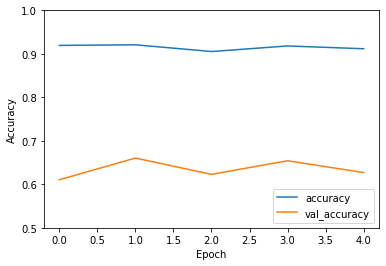

In [17]:


print(history.history)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


Loss

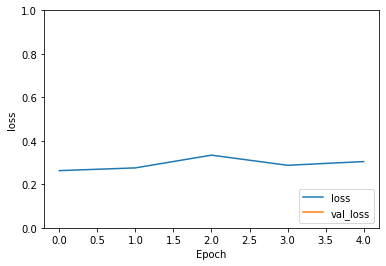

In [18]:
plt.figure
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [30]:
test = test_datagen.flow_from_directory("/content/gdrive/My Drive/garythung-trashnet/test_set",
                                                target_size=(224, 224),
                                                batch_size=490)


Found 490 images belonging to 6 classes.


In [0]:

test_img,test_label=next(test)
y_pred=model.predict_classes(test_img)

In [32]:
# y_pred=np.round(model.predict_generator(test,steps=1))
test.class_indices
test_loss, test_acc = model.evaluate(test_img,  test_label)

490/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [35]:
print(test_acc)
print(test_loss)

0.60612243
3.121969694020797


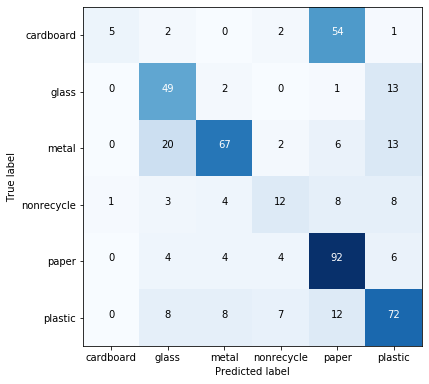

In [34]:
test_p=[]
for i in range(test_label.shape[0]):
  flag=0
  for j in range(test_label.shape[1]):
      if(test_label[i][j]==1):
        test_p.append(j)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
con_mat = confusion_matrix(test_p,y_pred)
def plot_confusion_matrix(cm,
                          target_names):

	cmap = plt.get_cmap('Blues')

	plt.figure(figsize=(6, 6))
	plt.imshow(cm, interpolation='nearest', cmap=cmap)

	if target_names is not None:
		tick_marks = np.arange(len(target_names))
		plt.xticks(tick_marks, target_names)
		plt.yticks(tick_marks, target_names)

	thresh = cm.max() / 2
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, "{:,}".format(cm[i, j]),
					horizontalalignment="center",
					color="white" if cm[i, j] > thresh else "black")
	
	plt.ylabel('True label')
	plt.xlabel('Predicted label')
	plt.tight_layout()
	plt.show()
 
labels = ['cardboard','glass','metal','nonrecycle','paper','plastic']
plot_confusion_matrix(con_mat, labels)

In [36]:
print(classification_report(test_p, y_pred, target_names=labels))

              precision    recall  f1-score   support

   cardboard       0.83      0.08      0.14        64
       glass       0.57      0.75      0.65        65
       metal       0.79      0.62      0.69       108
  nonrecycle       0.44      0.33      0.38        36
       paper       0.53      0.84      0.65       110
     plastic       0.64      0.67      0.65       107

    accuracy                           0.61       490
   macro avg       0.63      0.55      0.53       490
weighted avg       0.65      0.61      0.57       490

